<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/5_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


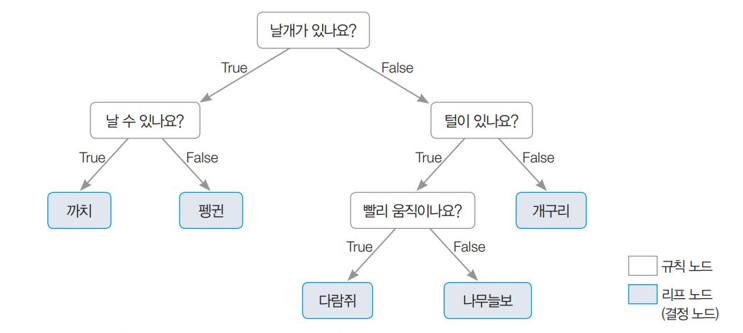

정보이득 : 엔트로피 개념
  - 엔트로피 : 데이터 집합의 혼잡도
    - 데이터 집합에 다른 데이터를 추가 -> 균일도가 떨어짐 -> 혼잡도가 높아지고 엔트로피는 낮아짐
    - 데이터 집합에 같은 데이터를 추가 -> 균일도가 높아짐 -> 혼잡도가 떨어지고 엔트로피는 높아짐
  - 정보이득이수 : 혼잡도가 줄어들어 얻게 되는 이득 (1-엔트로피)
  - 결정트리 : 정보이득지수가 높은 피처를 분할 기준

지니계수
  - 경제학 용어 : 소득불균형을 나타냄
  - 지니계수가 높을 수록 순도가 낮은 데이터
  - 지니계수가 0이면 완전 순수한 데이터 집합
  - 결정트리 : 지니계수가 낮은 피처를 분할 기준으로 사용

# 주요 파라미터
  - min_samples_plit : 노드분할을 위한 최소 샘플데이터 수
  - min_sample_leaf : 리프노드가 되기 위한 최소 샘플데이터 수
  - max_features : 최대 피처수
  - max_depth : 트리의 최대 높이
  - max_deaf_nodes : 리프 노드에 들어가는 최대 샘플수

In [3]:
!unzip '/content/drive/MyDrive/data/human+activity+recognition+using+smartphones.zip' -d data

Archive:  /content/drive/MyDrive/data/human+activity+recognition+using+smartphones.zip
replace data/UCI HAR Dataset.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: data/UCI HAR Dataset.names  
replace data/UCI HAR Dataset.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace data/UCI HAR Dataset.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: data/UCI HAR Dataset.zip  


In [4]:
!unzip '/content/data/UCI HAR Dataset.zip' -d data

Archive:  /content/data/UCI HAR Dataset.zip
   creating: data/UCI HAR Dataset/
  inflating: data/UCI HAR Dataset/.DS_Store  
   creating: data/__MACOSX/
   creating: data/__MACOSX/UCI HAR Dataset/
  inflating: data/__MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: data/UCI HAR Dataset/activity_labels.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: data/UCI HAR Dataset/features.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._features.txt  
  inflating: data/UCI HAR Dataset/features_info.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: data/UCI HAR Dataset/README.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._README.txt  
   creating: data/UCI HAR Dataset/test/
   creating: data/UCI HAR Dataset/test/Inertial Signals/
  inflating: data/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: data/__MACOSX/UCI HAR Dataset/test/
   creating: data/__MACOSX/UCI HAR Dataset/test/Inertial Signals/


In [21]:
feature_name_df = pd.read_csv('/content/data/UCI HAR Dataset/features.txt', sep='\s+',header = None, names=['index','feature_name'])


In [23]:
feature_name_df

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [18]:
X_train = pd.read_csv('/content/data/UCI HAR Dataset/train/X_train.txt', sep='\s+',header = None)

In [19]:
y_train = pd.read_csv('/content/data/UCI HAR Dataset/train/y_train.txt', sep='\s+',header = None)

In [28]:
X_train.shape , y_train.shape , feature_name_df.shape

((7352, 561), (7352, 1), (561, 2))

In [25]:
# feature name 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()

In [26]:
X_train.columns = feature_name

In [47]:
X_train['target'] = y_train

In [48]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",target
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,2
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,2
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,2
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,2


###Target 값 시각화

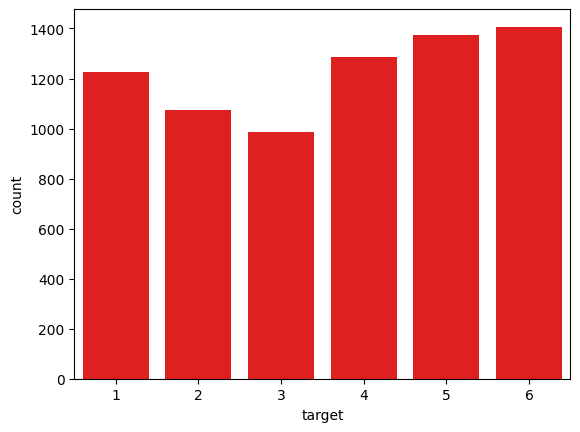

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=X_train , color = 'r')
plt.show()

In [35]:
X_test = pd.read_csv('/content/data/UCI HAR Dataset/test/X_test.txt', sep='\s+',header = None)

In [36]:
y_test = pd.read_csv('/content/data/UCI HAR Dataset/test/y_test.txt', sep='\s+',header = None)

In [37]:
X_test.columns = feature_name

In [42]:
X_test['target'] = y_test.to_numpy()

In [40]:
X_test.shape , X_train.shape

((2947, 562), (7352, 562))

In [43]:
X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",target
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,2
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,2
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,2
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,2


In [50]:
pd.read_csv('/content/data/UCI HAR Dataset/activity_labels.txt', sep='\s+',header = None)

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [45]:
activity_label = pd.read_csv('/content/data/UCI HAR Dataset/activity_labels.txt', sep='\s+',header = None)[1].values

In [46]:
activity_label , X_train['target'].unique()

(array(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
        'STANDING', 'LAYING'], dtype=object),
 array([5, 4, 6, 1, 3, 2]))

In [49]:
activity_label

array(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
       'STANDING', 'LAYING'], dtype=object)

### 결정트리

In [54]:
X_train['target'].value_counts().sort_index().index

Index([1, 2, 3, 4, 5, 6], dtype='int64', name='target')

In [64]:
# 데이터 분리
X = X_train.drop('target',axis = 1)
y = X_train['target']



In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=156)

In [66]:
dt.fit(X,y)

DecisionTreeClassifier(random_state=156)

In [67]:
# 예측
X_t = X_test.drop('target',axis = 1)
y_t = X_test['target'].to_numpy()
y_pred = dt.predict(X_t)

In [81]:
X_test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'target'],
      dtype='object', length=562)

In [91]:
y_pred_proba = dt.predict_proba(X_t)  # 다중 클래스 분류일 경우, 전체 클래스에 대한 확률 반환
print(roc_auc_score(y_t, y_pred_proba, multi_class='ovr'))

0.910951576153516


In [94]:
from sklearn.metrics import accuracy_score , f1_score , roc_auc_score
print(accuracy_score(y_t,y_pred))
print(f1_score(y_t,y_pred,average=None))
print(roc_auc_score(y_t,y_pred_proba, multi_class='ovo')) # roc_auc_score의 경우 y_pred 값을 확률값으로 넣어야 함

0.8595181540549711
[0.86071085 0.80837004 0.85090909 0.79446219 0.82565492 1.        ]
0.9105755391627165


In [77]:
np.unique(y_t)

array([1, 2, 3, 4, 5, 6])

## 현재 모델에 사용한 파라미터

In [78]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [ ]:
# 머신러닝에서 성능을 좌우하는 요소
# 1. 가장 중요한게... 데이터의 품질
# 2. 적절한 모델선정
# 3. 모델중에 파라미터의 값을 변경(최적을 파라미터 값을 차는게) -- 파라미터 튜닝

In [100]:
from sklearn.metrics import classification_report
df = DecisionTreeClassifier(random_state=0 , max_depth = 3) # 과소적합
df.fit(X,y)
y_pred = df.predict(X_t)
print(accuracy_score(y_t,y_pred))
print(classification_report(y_t,y_pred))

0.7224295894129623
              precision    recall  f1-score   support

           1       0.45      0.98      0.61       496
           2       0.00      0.00      0.00       471
           3       0.94      0.67      0.78       420
           4       0.79      0.81      0.80       491
           5       0.82      0.80      0.81       532
           6       1.00      1.00      1.00       537

    accuracy                           0.72      2947
   macro avg       0.67      0.71      0.67      2947
weighted avg       0.67      0.72      0.68      2947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
# 학습용
# X,y
# 테스트용
# X-t, y_t
from sklearn.metrics import classification_report
df = DecisionTreeClassifier(random_state=0 , max_depth = 15) ## 하이퍼 파라미터 조정
df.fit(X,y)
y_pred = df.predict(X_t)
print(accuracy_score(y_t,y_pred))
print(classification_report(y_t,y_pred))

0.8629114353579912
              precision    recall  f1-score   support

           1       0.84      0.91      0.88       496
           2       0.83      0.79      0.81       471
           3       0.87      0.83      0.85       420
           4       0.84      0.77      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



In [97]:
from sklearn.metrics import classification_report
df = DecisionTreeClassifier(random_state=0 , max_depth = 50)  ## 과대적합
df.fit(X,y)
y_pred = df.predict(X_t)
print(accuracy_score(y_t,y_pred))
print(classification_report(y_t,y_pred))


0.8595181540549711
              precision    recall  f1-score   support

           1       0.82      0.90      0.86       496
           2       0.84      0.78      0.81       471
           3       0.87      0.84      0.85       420
           4       0.83      0.76      0.79       491
           5       0.79      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



### 파라미터 튜닝  - 최적의 조합 찾기

In [102]:
params = {
    'max_depth' : [8,16,20],
    'min_samples_split' : [8,16,24]
}
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(df, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_cv.fit(X,y)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=15, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             scoring='accuracy')

In [109]:
pd.DataFrame(grid_cv.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [112]:
pd.DataFrame(grid_cv.cv_results_).loc[:,['param_max_depth','param_min_samples_split','mean_test_score']]

,param_max_depth,param_min_samples_split,mean_test_score
0,8,8,0.830795
1,8,16,0.829163
2,8,24,0.829571
3,16,8,0.808895
4,16,16,0.824539
5,16,24,0.826987
6,20,8,0.810119
7,20,16,0.821955
8,20,24,0.829707


In [110]:
grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 8, 'min_samples_split': 8}, 0.8307954826157308)

In [111]:
best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_t)
print(accuracy_score(y_t,y_pred))
print(classification_report(y_t,y_pred))

0.8741092636579573
              precision    recall  f1-score   support

           1       0.85      0.94      0.89       496
           2       0.84      0.79      0.82       471
           3       0.88      0.84      0.86       420
           4       0.87      0.76      0.81       491
           5       0.80      0.90      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.88      0.87      0.87      2947



## 트리모델은 지니계수나 정보이득계수를 통해 데이터를 분리해 나가면서
# 학습이 끝나면 가장 중요한 feature들의 정보를 알려준다

In [114]:
X_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'target'],
      dtype='object', length=562)

<Axes: >

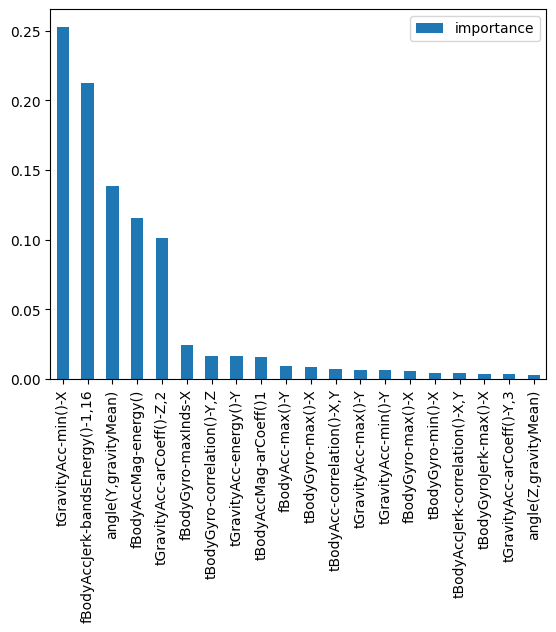

In [124]:
feature_importance_values = pd.DataFrame(best_model.feature_importances_ ,  index=X_train.columns[:-1], columns = ['importance']).sort_values(by='importance',ascending=False)
feature_importance_values.head(20).plot(kind='bar')

In [125]:
!pip install ucimlrepo

In [148]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [149]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [150]:
y

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [151]:
### 카테고리 데이터는 라벨 인코딩을 한다.
# ABC -> 0,1,2

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(['a','a','b','b','c','c'])

array([0, 0, 1, 1, 2, 2])

In [152]:
y

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [156]:
le = LabelEncoder()
X_label_encoding = X.apply(le.fit_transform).to_numpy()
y_label_encoding = le.fit_transform(y)
# le.fit.transform(X[col])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [157]:
# 결정트리 결정
# 파라메터의 정의
# 하이퍼 파라메터
dt = DecisionTreeClassifier(random_state=156)
grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_cv.fit(X_label_encoding,y_label_encoding)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=156),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             scoring='accuracy')

In [159]:
(X_label_encoding.shape ,y_label_encoding.shape)

((8124, 22), (8124,))

In [158]:

grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 8, 'min_samples_split': 8}, 0.8740768094534711)

In [160]:

best_model = grid_cv.best_estimator_


<Axes: >

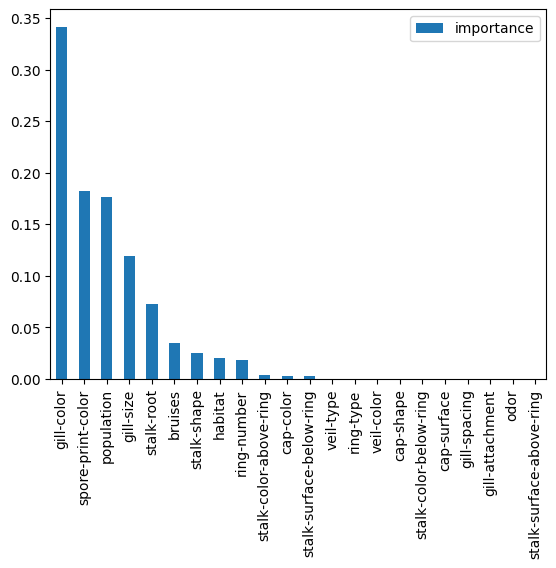

In [161]:

best_feature_df = pd.DataFrame(best_model.feature_importances_, columns=['importance'],index=X.columns).sort_values('importance',ascending=False)
best_feature_df.plot(kind='bar')